In [149]:
#Cargar las librerias
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

#Librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve, roc_auc_score

In [138]:
#1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [2]:
data = pd.read_csv('heart_cleveland_upload.csv')

In [142]:
#Realiza lectura de los datos
data.head(30)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [144]:
#Se realiza una descripcion de los datos
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [146]:
#Muestra informacion resumida de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [148]:
#Identifica la cantidad de valores nulos de la base de datos
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

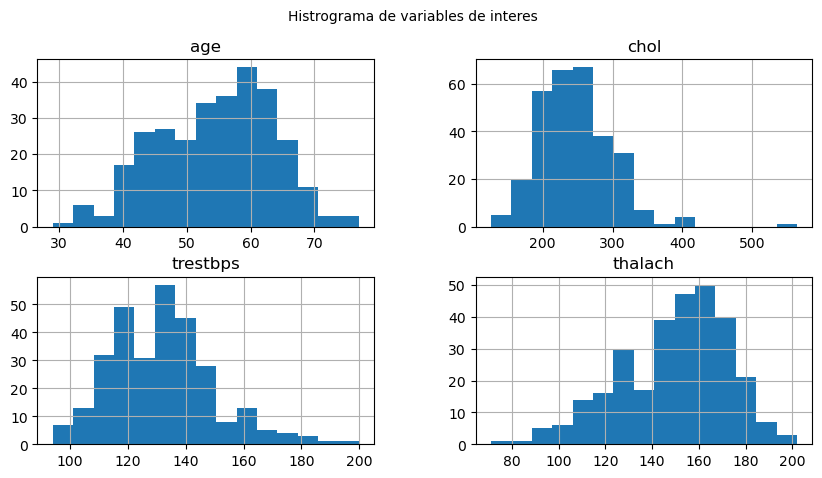

In [150]:
#Histrogramas
data[['age','chol','trestbps','thalach']].hist(bins=15, figsize=(10, 5))
plt.suptitle('Histrograma de variables de interes', fontsize=10)
plt.show()

Text(0, 0.5, 'Frecuencua maxima alcanzada')

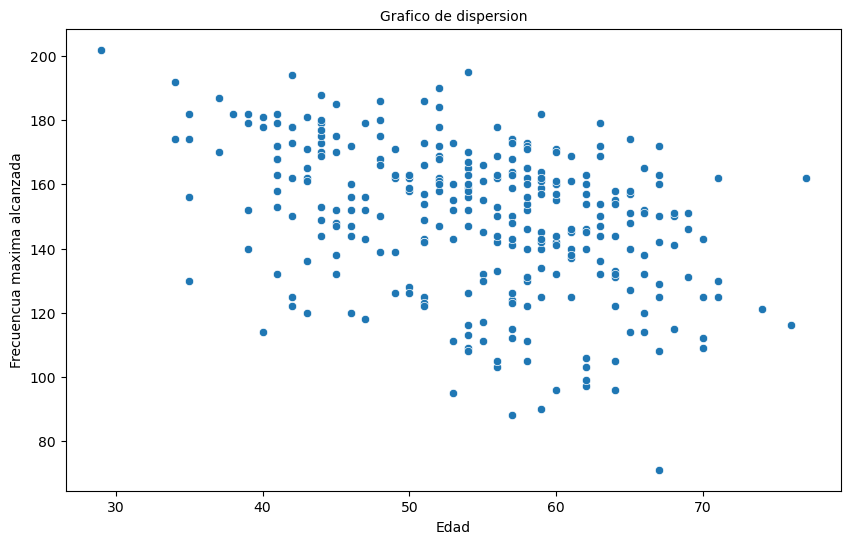

In [9]:
#Grafico de dispersion
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='thalach')
plt.title('Grafico de dispersion', fontsize=10)
plt.xlabel('Edad')
plt.ylabel('Frecuencua maxima alcanzada')
plt.show()

In [15]:
#2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [5]:
#Comprueba si existen registros duplicados
duplicado = data.duplicated().sum()
print(f"La cantidad de datos duplicados es: {duplicado}")

La cantidad de datos duplicados es: 0


In [ ]:
#3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

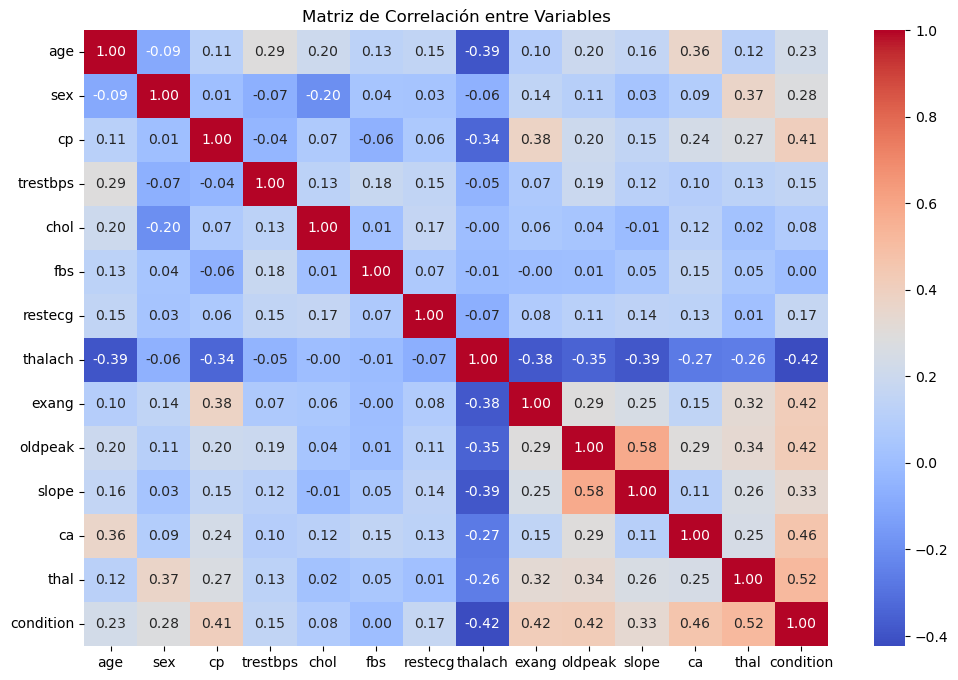

In [11]:
# Calcular la matriz de correlación
corr_matrix = data.corr()

# Graficar el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Variables")
plt.show()

In [13]:
# Correlación de las características con la variable objetivo 'condition'
corr_with_target = corr_matrix["condition"].sort_values(ascending=False)
corr_with_target

condition    1.000000
thal         0.520516
ca           0.463189
oldpeak      0.424052
exang        0.421355
cp           0.408945
slope        0.333049
sex          0.278467
age          0.227075
restecg      0.166343
trestbps     0.153490
chol         0.080285
fbs          0.003167
thalach     -0.423817
Name: condition, dtype: float64

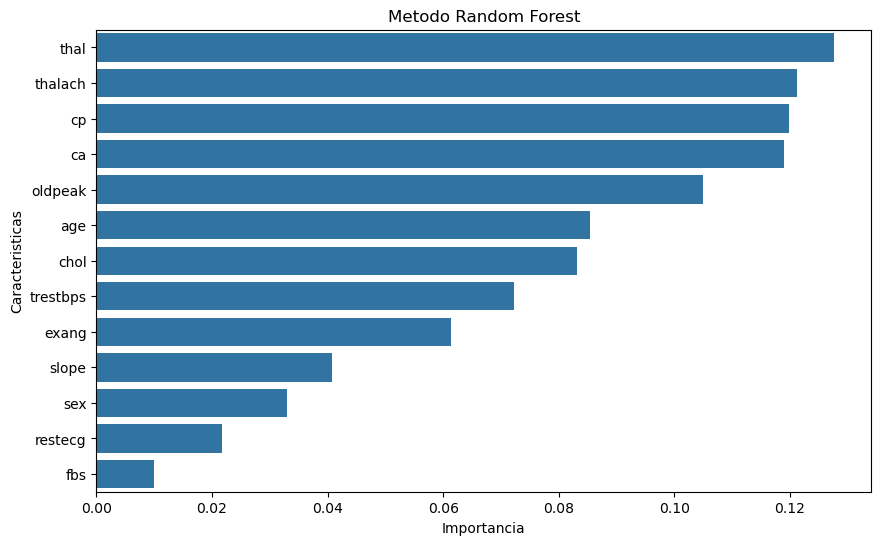

In [53]:
#Metodo Random Forest
#Se crean variables para separar las variebles menos 'condition' en x y cargar la variable objetivo en y.
x = data.drop('condition', axis=1)
y = data['condition']

#Se crea el modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(x, y)

#Se obtiene la importancia de las variables
importancia = model.feature_importances_

#Se crea un data frame para poder visualizar
feature_importances = pd.DataFrame({'Feature': x.columns, 'Importance':importancia})

#Se ordena las variables por importancia
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

#Se visualiza mediante un diagrama de barras
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Metodo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Caracteristicas')
plt.show()

In [ ]:
#4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [67]:
#Este codigo crea una división en un conjunto de datos en dos bloques, uno de entrenamiento y otro de prueba.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state= 0)

In [61]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
185,62,0,3,140,268,0,2,160,0,3.6,2,2,0
157,70,1,3,145,174,0,0,125,1,2.6,2,0,2
110,54,0,2,135,304,1,0,170,0,0.0,0,0,0
39,56,1,1,130,221,0,2,163,0,0.0,0,0,2
198,60,1,3,130,206,0,2,132,1,2.4,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,45,1,3,115,260,0,2,185,0,0.0,0,0,0
163,67,1,3,100,299,0,2,125,1,0.9,1,2,0
137,44,0,2,108,141,0,0,175,0,0.6,1,0,0
33,57,0,1,130,236,0,2,174,0,0.0,1,1,0


In [69]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
234,56,0,3,200,288,1,2,133,1,4.0,2,2,2
82,66,0,2,146,278,0,2,152,0,0.0,1,1,0
36,56,1,1,120,240,0,0,169,0,0.0,2,0,0
237,56,1,3,132,184,0,2,105,1,2.1,1,1,1
133,47,1,2,108,243,0,0,152,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,40,1,3,110,167,0,2,114,1,2.0,1,0,2
195,61,0,3,130,330,0,2,169,0,0.0,0,0,0
170,65,0,3,150,225,0,2,114,0,1.0,1,3,2
135,46,0,2,142,177,0,2,160,1,1.4,2,0,0


In [71]:
y_train

234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: condition, Length: 222, dtype: int64

In [65]:
y_test

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int64

In [ ]:
#5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [75]:
#Entrenando el modelo de regresion logistica
model_reg_log = LogisticRegression(solver = "liblinear")
model_reg_log.fit (x_train, y_train)

#Se crea el modelo de prediccion
prediccion = model_reg_log.predict(x_test)

prediccion

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [ ]:
#6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [95]:
#Culcula la precicion del modelo de regresion logistica
precision = accuracy_score (y_test, prediccion)
print("La presicion del modelo es:", precision)

La presicion del modelo es: 0.88


In [93]:
#Infrome de clasificacion
reporte = classification_report(y_test, prediccion)
print(reporte)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



In [ ]:
#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

<Figure size 800x600 with 0 Axes>

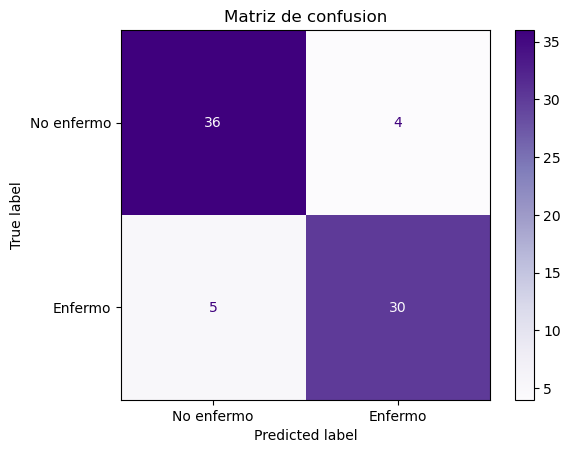

In [145]:
#Matriz de confusion
matriz=confusion_matrix(y_test,prediccion)

plt.figure(figsize=(8,6))
ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No enfermo','Enfermo']).plot(cmap='Purples')
plt.title('Matriz de confusion')
plt.show()

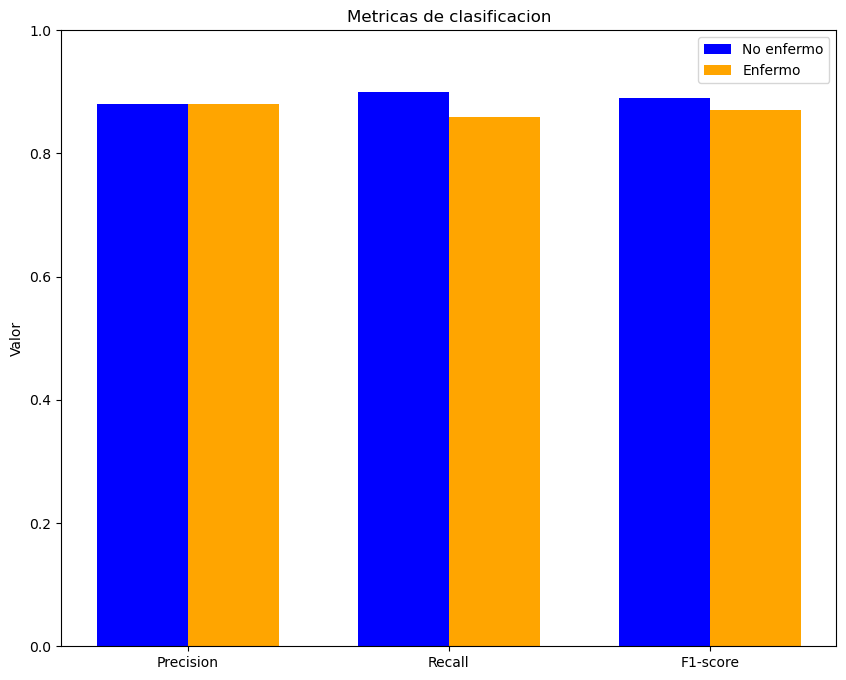

In [127]:
#Grafico de barras para las metricas de clasificacion
metricas = ['Precision', 'Recall', 'F1-score']
valores_0 = [0.88, 0.90, 0.89]
valores_1 = [0.88, 0.86, 0.87]

bar_width = 0.35
eje_x = np.arange(len(metricas))

plt.figure(figsize = (10,8))
plt.bar(eje_x - bar_width/2, valores_0, bar_width, label='No enfermo', color='blue')
plt.bar(eje_x + bar_width/2, valores_1, bar_width, label='Enfermo', color='orange')
plt.xticks(eje_x, metricas)
plt.ylim(0,1)
plt.ylabel('Valor')
plt.title('Metricas de clasificacion')
plt.legend()
plt.show()

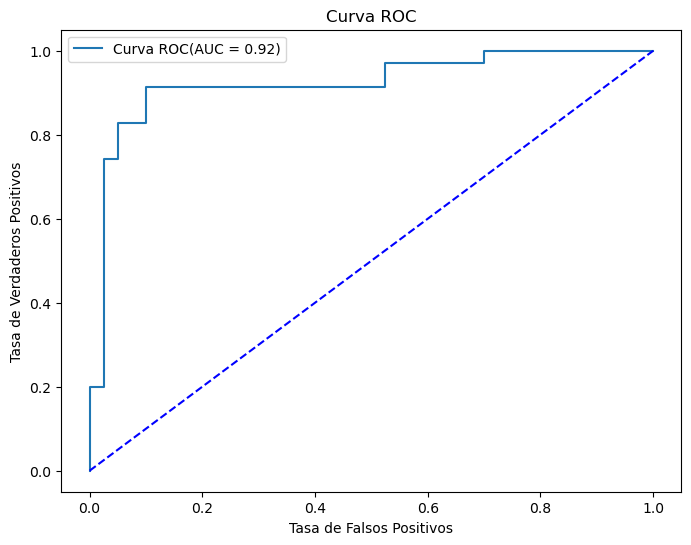

In [165]:
#Curva ROC
y_probab = model_reg_log.predict_proba(x_test)[:,1]
fpr,tpr, thresholds = roc_curve (y_test, y_probab)
roc_auc = roc_auc_score (y_test, y_probab)

plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, label = 'Curva ROC(AUC = {:.2f})'.format(roc_auc))
plt.plot([0,1], [0,1], linestyle='--', color='blue')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

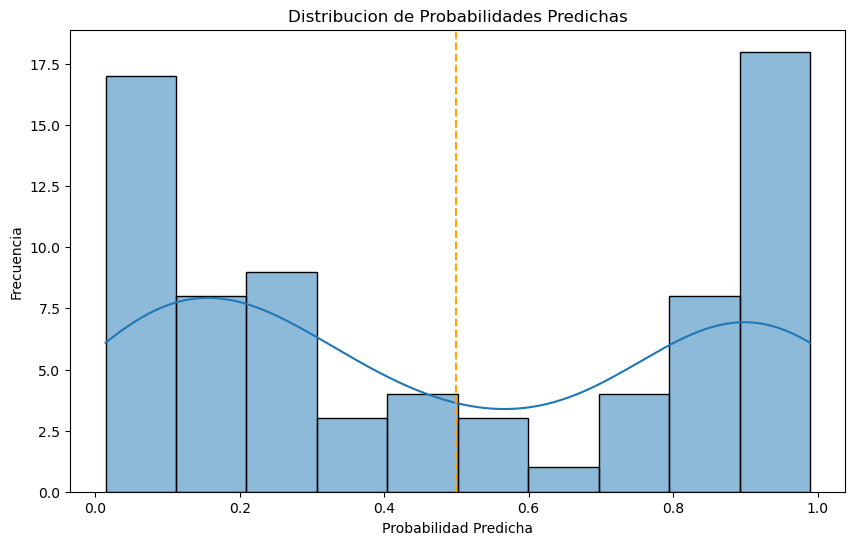

In [167]:
#Grafico de distribucion de probabilidades
plt.figure(figsize=(10,6))
sns.histplot(y_probab, bins=10, kde=True)
plt.axvline(0.5, color='orange', linestyle='--')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Probabilidades Predichas')
plt.show()